In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # Using Logistic Regression this time
from sklearn.metrics import accuracy_score, classification_report
import umap

In [4]:
# --- 1. Load a Real-time Representative Dataset ---
# The Iris dataset contains measurements of iris flowers from three different species.
# It has 4 features (sepal length/width, petal length/width) and 3 classes (species).
iris = load_iris()
X = iris.data     # The feature data (4 features per flower)
y = iris.target   # The species of the flower
target_names = iris.target_names # Names of the species

In [5]:
print(f"Original data shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class names: {target_names}")


Original data shape: (150, 4)
Number of classes: 3
Class names: ['setosa' 'versicolor' 'virginica']


In [6]:
# --- 2. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # Using 25% for testing this time

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (112, 4)
Testing data shape: (38, 4)


In [7]:
# --- 3. Apply UMAP for Dimensionality Reduction ---
# Reduce the 4 dimensions down to 2 for visualization.
# Even with low dimensions, UMAP can reveal non-linear structure.
reducer = umap.UMAP(n_neighbors=10,     # Adjusted parameters slightly
                    min_dist=0.05,
                    n_components=2,
                    random_state=42)

In [8]:
# Fit UMAP on training data and transform both train and test sets
X_train_umap = reducer.fit_transform(X_train)
X_test_umap = reducer.transform(X_test) # Transform test data using the learned mapping

print(f"UMAP transformed training data shape: {X_train_umap.shape}")
print(f"UMAP transformed testing data shape: {X_test_umap.shape}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


UMAP transformed training data shape: (112, 2)
UMAP transformed testing data shape: (38, 2)


In [9]:
# --- 4. Train a Machine Learning Algorithm on UMAP-Transformed Data ---
# Using Logistic Regression this time. It's a linear model,
# but can work on the non-linearly transformed UMAP space.
logreg = LogisticRegression(max_iter=200) # Increased max_iter for convergence

In [10]:
# Train the Logistic Regression model using the 2D UMAP embeddings
logreg.fit(X_train_umap, y_train)

LogisticRegression(max_iter=200)

In [11]:
# --- 5. Evaluate the Machine Learning Algorithm ---
# Predict on the UMAP-transformed test data
y_pred = logreg.predict(X_test_umap)

In [12]:
# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of Logistic Regression on UMAP-reduced test data: {accuracy:.4f}")


Accuracy of Logistic Regression on UMAP-reduced test data: 1.0000


In [13]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



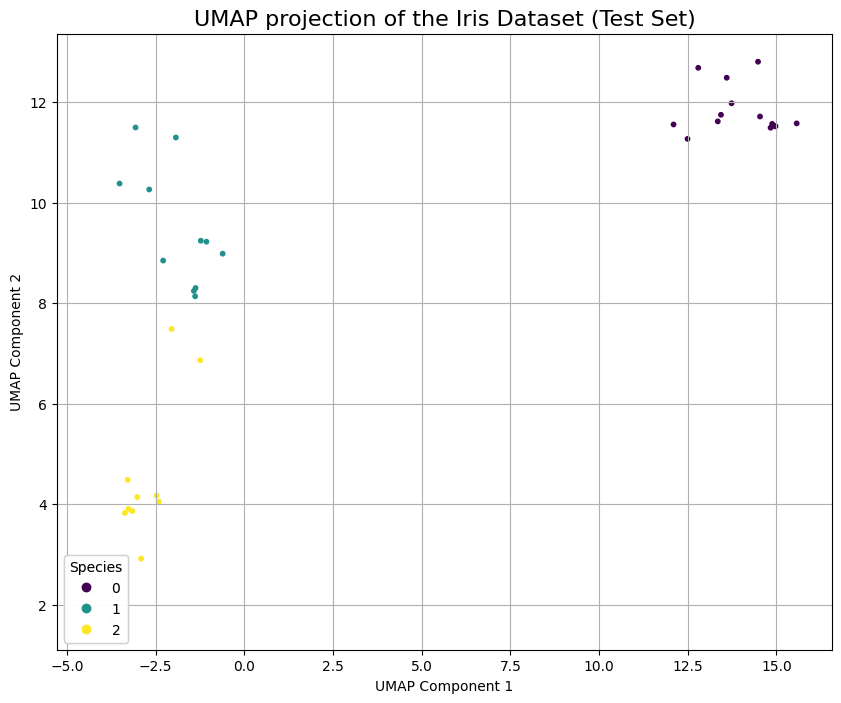

In [14]:
# --- 6. Visualize the UMAP Embedding ---
# Plot the 2D UMAP embedding of the test data, colored by their true labels.
# This visualizes the separation of the three Iris species in the UMAP space.
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_test_umap[:, 0], X_test_umap[:, 1], c=y_test, cmap='viridis', s=10) # Using 'viridis' colormap
plt.title('UMAP projection of the Iris Dataset (Test Set)', fontsize=16)
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
# Add a legend for the colorbar
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower left", title="Species")
plt.gca().add_artist(legend1)
plt.grid(True)
plt.show()

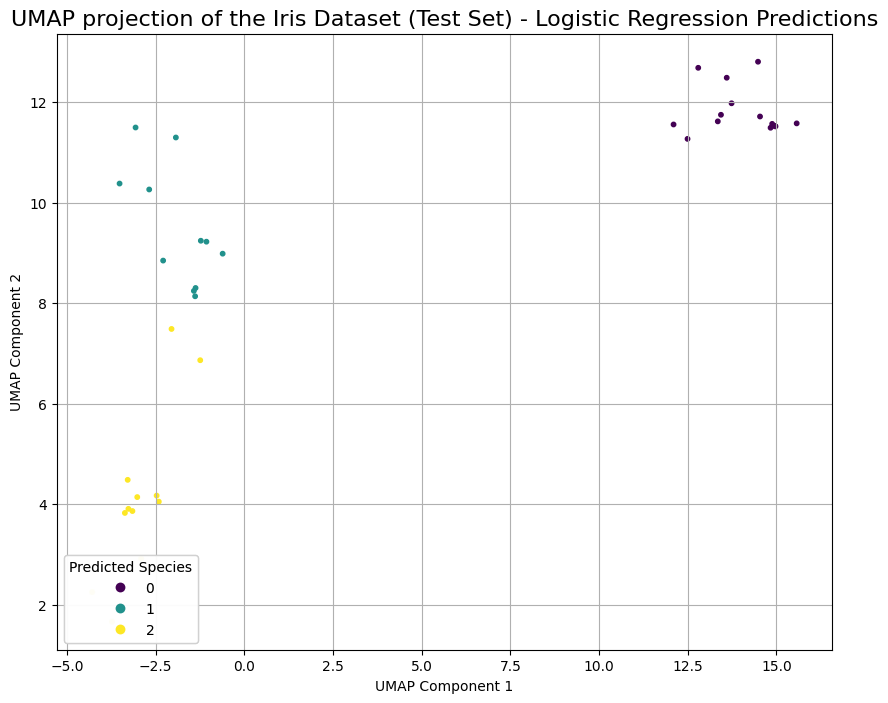

In [15]:

# Optional: Visualize the UMAP embedding colored by predicted labels
plt.figure(figsize=(10, 8))
scatter_pred = plt.scatter(X_test_umap[:, 0], X_test_umap[:, 1], c=y_pred, cmap='viridis', s=10)
plt.title('UMAP projection of the Iris Dataset (Test Set) - Logistic Regression Predictions', fontsize=16)
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
# Add a legend for the colorbar
legend2 = plt.legend(*scatter_pred.legend_elements(),
                    loc="lower left", title="Predicted Species")
plt.gca().add_artist(legend2)
plt.grid(True)
plt.show()